In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('collecting_imdb/movie_meta.csv')

In [27]:
df.head(2)

,imdbid,title,director,cast,storyline,keywords,genre,production,color,language,country,rated,runtime,Worldwide_Gross,num_rating
0,114709,toy story (1995),JohnLasseter,tomhanks timallen donrickles,a little boy named andy loves to be in his roo...,toy rivalry cowboy cgi animation claw crane Se...,Genres Animation Adventure Comedy Family Fantasy,Disney Pictures Pixar Animation Studios See more,Color Technicolor,English,USA,G,1h21min,373554033.0,"894,169"
1,113497,jumanji (1995),JoeJohnston,robinwilliams kirstendunst bonniehunt,jumanji one of the most unique and dangerous b...,board game adventurer fight game year 1995 See...,Genres Adventure Comedy Family Fantasy,Pictures Interscope Communications Teitler Fil...,Color Technicolor,English French,USA,P,1h44min,262797249.0,"311,232"


In [28]:
df.isnull().sum()

imdbid               0
title              321
director           321
cast               462
storyline          321
keywords           321
genre              321
production         321
color              321
language           321
country            321
rated              321
runtime            321
Worldwide_Gross    321
num_rating         321
dtype: int64

In [29]:
# Some links from were broken, or some values were empty for some movies
# will drop because they are a minority of the data
## fixing the index after drop


df = df.dropna()

movies = df.copy(deep=True)

movies = movies.reset_index().drop(columns=['index'])

df = df.reset_index().drop(columns=['index'])

In [30]:
df.head(2)

,imdbid,title,director,cast,storyline,keywords,genre,production,color,language,country,rated,runtime,Worldwide_Gross,num_rating
0,114709,toy story (1995),JohnLasseter,tomhanks timallen donrickles,a little boy named andy loves to be in his roo...,toy rivalry cowboy cgi animation claw crane Se...,Genres Animation Adventure Comedy Family Fantasy,Disney Pictures Pixar Animation Studios See more,Color Technicolor,English,USA,G,1h21min,373554033.0,"894,169"
1,113497,jumanji (1995),JoeJohnston,robinwilliams kirstendunst bonniehunt,jumanji one of the most unique and dangerous b...,board game adventurer fight game year 1995 See...,Genres Adventure Comedy Family Fantasy,Pictures Interscope Communications Teitler Fil...,Color Technicolor,English French,USA,P,1h44min,262797249.0,"311,232"


In [31]:
df.isnull().sum()

imdbid             0
title              0
director           0
cast               0
storyline          0
keywords           0
genre              0
production         0
color              0
language           0
country            0
rated              0
runtime            0
Worldwide_Gross    0
num_rating         0
dtype: int64

In [33]:
df.columns.values

array(['imdbid', 'title', 'director', 'cast', 'storyline', 'keywords',
       'genre', 'production', 'color', 'language', 'country', 'rated',
       'runtime', 'Worldwide_Gross', 'num_rating'], dtype=object)

In [34]:
# turn every column data into string for nlp
movies = movies.applymap(str)


# identify columns 
cols = [ 'director', 'cast', 'storyline', 'keywords', 'genre',
       'production', 'color', 'language', 'country', 'rated', 'runtime',
       'Worldwide_Gross', 'num_rating']

# lower case all the words
# to reduce amount of data
for col in cols:   
    movies[col] = movies[col].map(lambda x: x.lower())
    
    movies[col] = movies[col].map(lambda x: x.split(' '))


## iterate over every row of the dataframe
## concanonate all the feature colums into one column
movies['Bag_of_words'] = ''
columns = [ 'director', 'cast', 'keywords', 'genre',
       'production', 'color', 'rated', 
       'Worldwide_Gross', 'num_rating']

for index, row in movies.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    row['Bag_of_words'] = words

    
movies = movies[['title','Bag_of_words']]

In [35]:
# immports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import  cosine_similarity
from sklearn.metrics.pairwise import  euclidean_distances

In [36]:
# vectorize bag of words with tfid

count = TfidfVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies['Bag_of_words'])

In [37]:
# try both cosine and euclidean distance for similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)
euc_sim = euclidean_distances(count_matrix, count_matrix)

## test which similarity is better

In [42]:
def get_movie_idx(title, df=movies):
    return df[df['title'] == title].index[0]

In [48]:
def recommend(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = get_movie_idx(title)
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_movies.append(list(movies['title'])[i])
        print(df['genre'][i])
    return recommended_movies

In [49]:
def recommend_uec(title, euc_sim = euc_sim):
    recommended_movies = []
    idx = get_movie_idx(title)
    score_series = pd.Series(euc_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_movies.append(list(movies['title'])[i])
        print(df['genre'][i])
    return recommended_movies

In [50]:
recommend_uec('toy story (1995)')

Genres Drama
Genres Drama War
Genres Drama History Mystery Thriller
Genres Biography Drama Musical Romance
Genres Drama Sci Fi
Genres Drama
Genres Drama
Genres Crime Drama
Genres Drama Romance
Genres Action Drama


['glen or glenda (1953)',
 'germania anno zero (1948)',
 'das weiße band - eine deutsche kindergeschichte (2009)',
 'the great ziegfeld (1936)',
 'solyaris (1968)',
 'a streetcar named desire (1951)',
 'viridiana (1961)',
 'à bout de souffle (1960)',
 'tabu (2012)',
 'dai-bosatsu tôge (1966)']

In [51]:
recommend('toy story (1995)')

Genres Animation Adventure Comedy Family Fantasy
Genres Animation Adventure Comedy Family Fantasy
Genres Animation Adventure Comedy Family Sci Fi Sport
Genres Animation Adventure Comedy Family Fantasy
Genres Animation Adventure Family Romance Sci Fi
Genres Animation Short Action Comedy Family Musical
Genres Animation Adventure Comedy Drama Family Fantasy Sci Fi
Genres Animation Action Adventure Comedy Family Sci Fi
Genres Animation Short Adventure Comedy Family Fantasy
Genres Animation Adventure Family Fantasy Music Mystery


['toy story 2 (1999)',
 'toy story 3 (2010)',
 'cars 2 (2011)',
 'monsters university (2013)',
 'wall·e (2008)',
 'tangled ever after (2012)',
 'lilo & stitch (2002)',
 'incredibles 2 (2018)',
 'dragons: gift of the night fury (2011)',
 'coco (2017)']

#### cosine does a better job of getting similarities
#### from observation ( genres, and titles)

In [58]:
# saving cosine matrix
# for deployment
np.save('cosine_sim.npy', cosine_sim)

In [52]:
from bs4 import BeautifulSoup
import requests
import re
from PIL import Image
from io import BytesIO

---

## putting all together, get images of top three recommend
## will be refashioned for deployment (flask)

In [56]:
def create_link(x):
    if len(str(x)) < 6:
        x = '0' + str(x)
    return 'https://www.imdb.com/title/tt0' + str(x)

def get_movie_idx(title):
    return df[df['title'] == title].index[0]


def get_images(link):
    r = requests.get(link)
    soup = BeautifulSoup(r.text, 'lxml')
    poster  = soup.find('div', class_="poster")
    link = poster.find('img').get('src')
    r = requests.get(link)
    im = Image.open(BytesIO(r.content))
    return  im

def recommend(title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    idx = get_movie_idx(title)
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        print(df.loc[i].title)
    
    
    print(df.loc[top_10_indices[0], 'title'])
    links = list()
    for i in top_10_indices:
        recommended_movies.append(list(movies['title'])[i])
        link = create_link(df['imdbid'][i])
        links.append(link)

#     print(links)
    images = list()
    for i in range(len(links)):
        im = get_images(links[i])
        images.append(im)   

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.suptitle('Top three movies recommended by content')

    ax1.imshow(images[0])
    ax1.axis('off')
    ax2.imshow(images[1])
    ax2.axis('off')
    ax3.imshow(images[2])
    ax3.axis('off')
    return 

toy story 2 (1999)
toy story 3 (2010)
cars 2 (2011)
monsters university (2013)
wall·e (2008)
tangled ever after (2012)
lilo & stitch (2002)
incredibles 2 (2018)
dragons: gift of the night fury (2011)
coco (2017)
toy story 2 (1999)


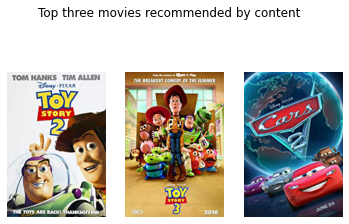

In [57]:
recommend('toy story (1995)')